# GRADIENT DESCENT

#### 1) Gradient Descent is an iterative optimization algorithm that tries to find the optimum value (Minimum/Maximum) of an objective function and here the objective function is the loss function i.e Loss Error.
#### 2) The main aim of gradient descent is to find the best parameters of a model which gives the highest accuracy on training as well as testing datasets
#### 3) The gradient is a vector that points in the direction of the steepest increase of the function at a specific point. Moving in the opposite direction of the gradient allows the algorithm to gradually descend towards lower values of the function, and eventually reaching to the minimum of the function.

# Steps Required in Gradient Descent Algorithm 

#### Step 1 we first initialize the parameters of the model randomly 
#### Step 2 Compute the gradient of the cost function with respect to each parameter. It involves making partial differentiation of cost function with respect to the parameters. 
#### Step 3 Update the parameters of the model by taking steps in the opposite direction of the model. Here we choose a hyperparameter learning rate which is denoted by alpha. It helps in deciding the step size of the gradient. 
#### Step 4 Repeat steps 2 and 3 iteratively to get the best parameter for the defined model 

# Learning Rate

####  learning Rate controls how much the value of M & C changes with each step and therefore LR should be 0.01 for best accuarcy. 
#### If LR is too high the gradient descent won't reach the minimum point and keep oscillating
#### If LR is too small then it will take lot of iteratios to get the accurate value

## Calculate the partial derivative of Loss Function with Respect to m & c 

#### Let's differentiate the function for only the terms containg M and consider everything else to be constant as we applying the partial derivates with respects to "m" first.

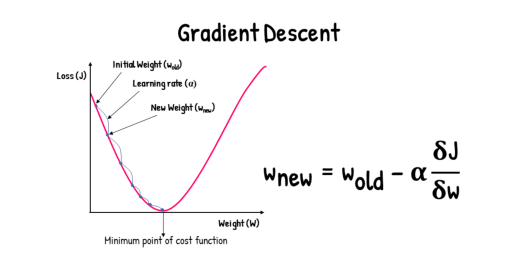

In [3]:
import matplotlib.pyplot as plt
image = plt.imread('1707688084850.png')
plt.imshow(image)
plt.axis('off')  # Turn off axis
plt.show()

#### The cost function typically used is the Mean Squared Error (MSE), which calculates the average squared difference between the predicted values and the actual values. The aim is to minimize this error, indicating a better fit of the model to the data.

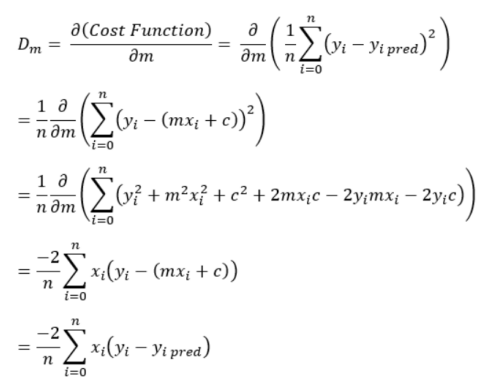

In [4]:
import matplotlib.pyplot as plt
image = plt.imread('976048.png')
plt.imshow(image)
plt.axis('off')  # Turn off axis
plt.show()

#### Similarly, let’s find the partial derivative with respect to c. Let partial derivative of the Cost function with respect to c be Dc (With little change in c how much Cost function changes).

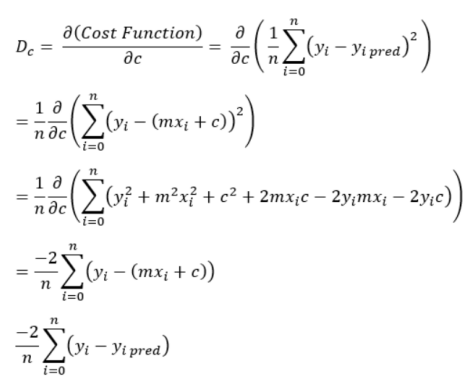

In [5]:
image = plt.imread('978019.png')
plt.imshow(image)
plt.axis('off')  # Turn off axis
plt.show()

#### Now update the current values of m and c using the following equation:

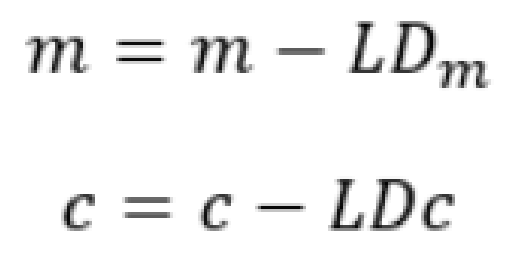

In [6]:
image = plt.imread('9717210.png')
plt.imshow(image)
plt.axis('off')  # Turn off axis
plt.show()

# Types of Gradient Descent: 

### 1) Batch Gradient Descent

#### Batch Gradient Descent involves calculations over the full training set at each step as a result of which it is very slow on very large training data. Thus, it becomes very computationally expensive to do Batch GD.Batch gradient descent takes longer to converge since it computes the gradient using the entire training dataset in each iteration.Batch gradient descent is more accurate since it computes the gradient using the entire training dataset.

### 2) Stochastic Gradient Descent
#### In SGD, instead of using the entire dataset for each iteration, only a single random training example (or a small batch) is selected to calculate the gradient and update the model parameters. This random selection introduces randomness into the optimization process, hence the term “stochastic” in stochastic Gradient Descent.

### 3) Mini-batch Gradient Descent
#### It is a compromise between batch gradient descent and stochastic gradient descent. In mini-batch gradient descent, the gradients are computed on a small random subset of the training dataset, typically between 10 and 1000 examples, called a mini-batch. This reduces the computational cost of the algorithm compared to batch gradient descent, while also reducing the variance of the updates compared to SGD

In [79]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import gradient_descent as gd

In [45]:
df=pd.read_csv("homeprices_banglore.csv")

In [52]:
#sample 5 records
#df.sample(5)
df.head(10)

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00
5,1170,2,38.00
6,2732,4,135.00
7,3300,4,155.00
8,1310,3,50.00
9,3700,5,167.00


### We observed that age is not the factor for predicting the price of a house. Therefore Area & Bedrooms are the only factors for predicting the house price. Hence the two features Area and Bedrooms are the independent variable and price is the output or dependent variable.

## Price = W1 * Area+ W2 * Bedrooms +Bias (Constant)

### Implement Gradient Descent

In [84]:
# lets assign the W1 and W2 weights are 1 .
np.ones(shape=(1,2))

array([[1., 1.]])

Preprocessing/Scaling: Since our columns are on different sacle it is important to perform scaling on them

In [86]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [87]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [88]:
scaled_y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [91]:
def gradiet_descent(X,y_true,epochs,learning_rate=0.01):
    number_of_features =X.shape[1]
    bias=0
    weight=np.ones(shape=(number_of_features))
    
    total_samples = X.shape[0] # number of rows in X
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        y_predicted = np.dot(weight, X.T) + bias # w1 * area + w2 * bedroom
        
        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        weight = weight - learning_rate * w_grad
        bias = bias - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        
        cost_list.append(cost)
        epoch_list.append(i)
        
        return weight, bias, cost, cost_list, epoch_list
w, b, cost, cost_list, epoch_list = gradiet_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost  

(array([0.99551317, 0.99445655]), -0.009603223499361428, 0.2768777174681)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, scaled_y, test_size = 0.2, random_state = 42)

In [94]:
lr = LinearRegression()  # instantiate Linear Regression
lr.fit(X_train,y_train)  # Sk-Learn also does least square fitting
print("Intercept:", lr.intercept_.round(2))
print("Coefficient:", lr.coef_.round(2))

Intercept: [-0.07]
Coefficient: [[0.9  0.22]]


In [95]:
y_pred = lr.predict(X_test)

In [96]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('R2:', metrics.r2_score(y_test, y_pred))

RMSE: 0.03508327411891267
MAE: 0.026654363947879553
R2: 0.9788928974927494


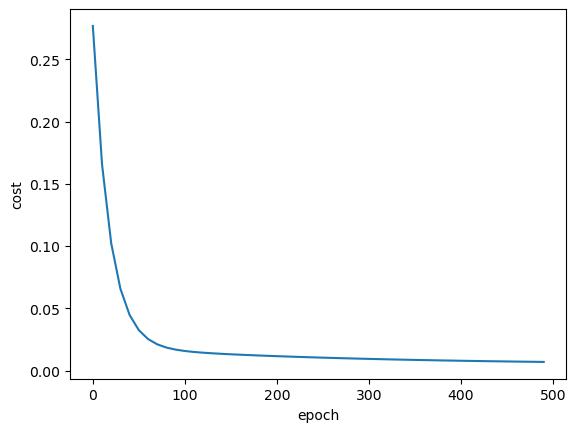

In [97]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [98]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

C:\Users\adity\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [101]:
predict(1410,3
        ,w,b)

C:\Users\adity\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


66.51599944002328